# Деревья принятия решений на ирисах Фишера

Древовидная модель – это набор правил импликации вида "если-то-иначе", которые просто понять и реализовать.

In [1]:
import pydotplus
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report

In [2]:
# Загрузить данные
iris = datasets.load_iris()
# Создать матрицу признаков
features = iris.data
# Создать вектор целей
target = iris.target
# Создать список имён целевых классов
class_names = iris.target_names
# Создать тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1, test_size=0.4)

> СОЗДАТЬ ОБЪЕКТ-КЛАССИФИКАТОР ДЕРЕВА ПРИНЯТИЯ РЕШЕНИЙ

In [3]:
decisiontree = DecisionTreeClassifier(random_state=0)

> ТРЕНИРОВОЧНАЯ ВЫБОРКА

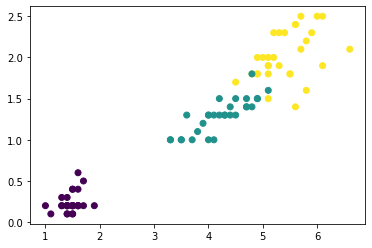

In [4]:
# Отобразить данные тренировочной выборки через диаграмму рассеяния
plt.scatter([x[2] for x in features_train], [x[3] for x in features_train], c=target_train)
plt.show()

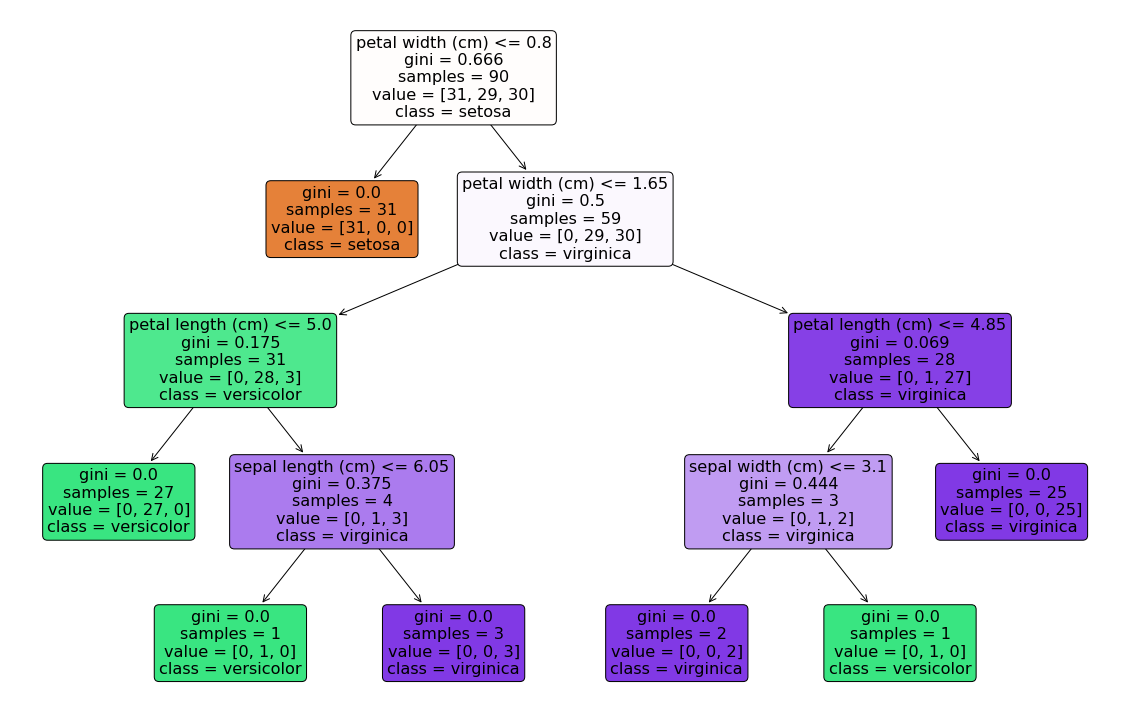

In [5]:
model_train = decisiontree.fit(features_train, target_train) # натренировать модель
plt.figure(figsize=((20,13)))
plot_tree(model_train, # построить само дерево решений на основе натренированной модели обучающей выборки
          filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        30

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



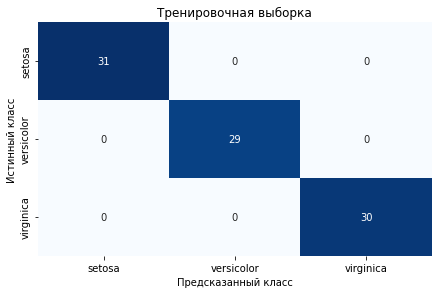

In [6]:
# Сделать предсказания и рассчитать точность модели через коэффициент детерминации
y_pred_train = model_train.predict(features_train)

print(classification_report(target_train, y_pred_train))

# Создать матрицу ошибок
matrix_train = confusion_matrix(target_train, y_pred_train)
# Создать фрейм данных pandas
dataframe_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
# Создать тепловую карту
sns.heatmap(dataframe_train, annot=True, cbar=None, cmap="Blues")
plt.title("Тренировочная выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

> ТЕСТОВАЯ ВЫБОРКА

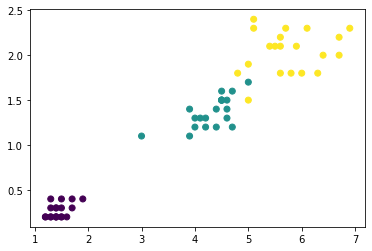

In [7]:
# Отобразить данные тестовой выборки через диаграмму рассеяния
plt.scatter([x[2] for x in features_test], [x[3] for x in features_test], c=target_test)
plt.show()

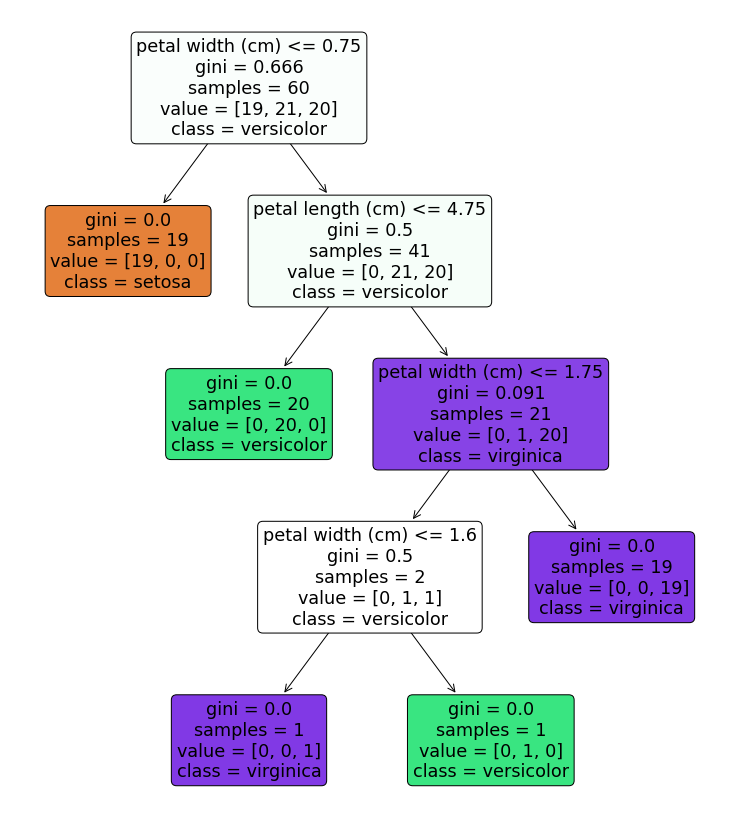

In [8]:
model_test = decisiontree.fit(features_test, target_test)
plt.figure(figsize=((13,15)))
plot_tree(model_test, # построить само дерево решений на основе натренированной модели тестовой выборки
          filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True)
plt.show()

Функция classification_report обеспечивает оперативное средство для того, чтобы увидеть некоторые распространённые оценочные метрические показатели, включая точность, полноту и оценку F_1. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



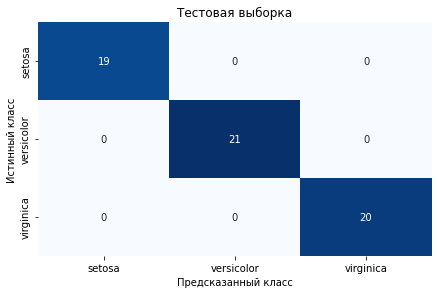

In [9]:
# Сделать предсказания и рассчитать точность модели через коэффициент детерминации
y_pred_test = model_test.predict(features_test)

print(classification_report(target_test, y_pred_test)) # создать классификационный отчёт

# Создать матрицу ошибок
matrix_test = confusion_matrix(target_test, y_pred_test)
# Создать фрейм данных pandas
dataframe_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
# Создать тепловую карту
sns.heatmap(dataframe_test, annot=True, cbar=None, cmap="Blues")
plt.title("Тестовая выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()